<a href="https://colab.research.google.com/github/alfianpr/perhitungan-volume-objek-simetri/blob/main/Ekstraksi_ciri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perhitungan jumlah pixel (Luasan)
1. Mengonversi RGB ke Grayscale
2. Gaussian Filtering dan Otsu thresholding (Image segmentation)
3. Morfologi erosi dan dilatasi
4. Perhitungan jumlah pixel


<function matplotlib.pyplot.show>

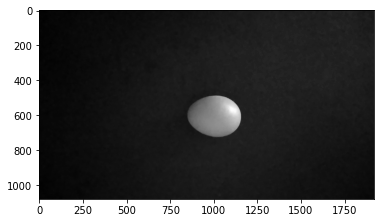

In [ ]:
#Load library-library yang dibutuhkan
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Menginput gambar dan mengonversi dari RGB ke Grayscale
img = cv.imread('/content/100.jpg', 0)

plt.imshow(img, cmap="gray")
plt.show

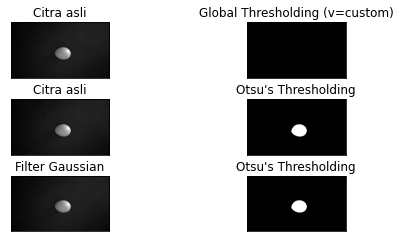

In [ ]:
#Melakukan Thresholding untuk mengonversi citra ke dalam bentuk binner

# global thresholding
ret1,th1 = cv.threshold(img,215,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Menampilkan semua hasil Threshold Otsu
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Citra asli','0','Global Thresholding (v=custom)',
          'Citra asli','0',"Otsu's Thresholding",
          'Filter Gaussian','0',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

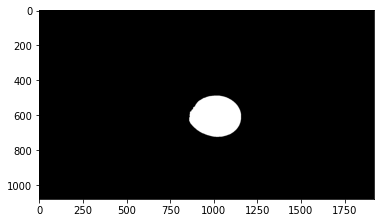

In [ ]:
#Melakukan Open Morphology untuk menghilangkan noise
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(th3, cv.MORPH_OPEN, kernel)
plt.imshow(opening, cmap="gray")
plt.show()

In [ ]:
#Jumlah pixel hitam setelah filter gaussian
Jumlah_Pixel_Hitam = np.sum(opening == 0)
Jumlah_Pixel_Putih = np.sum(opening == 255)
print("Jumlah Pixel Hitam : ", Jumlah_Pixel_Hitam)
print("Jumlah Pixel Putih : ", Jumlah_Pixel_Putih)

Jumlah Pixel Hitam :  2019122
Jumlah Pixel Putih :  54478
